In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
os.getcwd()
os.chdir('C:\\Users\\umairansari\\Desktop')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

## CODE FOR THE CLEANED DATA WITH SOME FEATURES(uncomment the next cell and run for partical data)

In [2]:
# #loading the data
# #you can skip this part
# data=pd.read_csv("Diabetes_data_3.csv")
# #dropping the a1cresult category-0
# data["A1Cresult_Category"][data["A1Cresult_Category"]==0]=np.nan
# #dropping the 0 values after assigning them as na
# data.dropna(axis=0,inplace=True)

# #checking the Age data from(what ages our data contain)
# data["Age_Range"].plot(kind="hist",bins=15,color="green")
# plt.title("Age range of the data column")
# plt.ylabel("Number of children")
# plt.xlabel("Age in Number")


# #females vs diabetes
# lis1=np.arange(0,12).tolist()
# plt.figure(figsize=(10,6))
# female_data=data[data["Female"]==1]
# sns.lineplot(female_data["Age_Range"],y=data["A1Cresult_Category"],)
# plt.xticks(ticks=lis1)
# plt.yticks(ticks=[2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3])
# plt.legend(["exact counts","extended number"])
# plt.title("Women suffering from Diabetes respected to their ages")
# plt.ylabel("Number of Females suffering")

# #males vs diabetes
# lis1=np.arange(0,12).tolist()
# plt.figure(figsize=(10,6))
# male_data=data[data["Male"]==1]
# sns.lineplot(x=male_data["Age_Range"],y=data["A1Cresult_Category"],)
# plt.xticks(ticks=lis1)
# plt.yticks(ticks=[2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3])
# plt.legend(["exact counts","extended number"])
# plt.title("Men suffering from Diabetes wrt age")
# plt.ylabel("Number of males suffering")

# #females vs diabetes
# plt.figure(figsize=(10,6))
# female_data=data[data["Female"]==1]
# sns.countplot(female_data["Female"],hue=data["A1Cresult_Category"],)
# plt.legend(["normal","less severe","More severe"])
# plt.title("Women suffering from Diabetes")
# plt.ylabel("Number of Females suffering")

# #males vs diabetes
# male_data=data[data["Male"]==1]
# sns.countplot(male_data["Male"],hue=data["A1Cresult_Category"],)
# plt.legend(["normal","less severe","More severe"])
# plt.title("Men suffering from Diabetes")
# plt.ylabel("Number of males suffering")

# #splitting the data 
# train,test=train_test_split(data,test_size=.33,random_state=42)
# train.shape,test.shape
# x_train=train.drop(["A1Cresult_Category"],axis=1)
# y_train=train["A1Cresult_Category"]
# x_test=test.drop(["A1Cresult_Category"],axis=1)
# y_test=test["A1Cresult_Category"]
# x_train.shape,y_train.shape,x_test.shape,y_test.shape

# #logistic regression
# LRC=LogisticRegressionCV(n_jobs=-1,class_weight='balanced',cv=5)
# LRC.fit(x_train,y_train)
# predicted_lrc=LRC.predict(x_test)
# print(classification_report(y_test,predicted_lrc))
# print(accuracy_score(y_test,predicted_lrc))



# #decision trees classifier
# DTC=DecisionTreeClassifier(class_weight='balanced')
# DTC.fit(x_train,y_train)
# predicted_dtc=DTC.predict(x_test)
# print(classification_report(y_test,predicted_dtc))
# print(accuracy_score(y_test,predicted_dtc))



# #extra trees classifier
# ETC=ExtraTreeClassifier(class_weight='balanced')
# ETC.fit(x_train,y_train)
# predicted_etc=ETC.predict(x_test)
# print(classification_report(y_test,predicted_etc))
# print(accuracy_score(y_test,predicted_etc))


# #randomforestclassifier
# RFC=RandomForestClassifier(class_weight='balanced')
# RFC.fit(x_train,y_train)
# predicted_rfc=RFC.predict(x_test)
# print(classification_report(y_test,predicted_rfc))
# print(accuracy_score(y_test,predicted_rfc))


# #gradient boosting
# GBC=GradientBoostingClassifier()
# GBC.fit(x_train,y_train)
# predicted_x_gbc=GBC.predict(x_test)
# print(classification_report(y_test,predicted_x_gbc))
# print(accuracy_score(y_test,predicted_x_gbc))



## CODE FOR FULL DATASET
#### H0:The patient will be readmitted
#### H1:Patient wont be readmitted

In [3]:
#loading the data
datafull=pd.read_csv("diabetic_data.csv")

In [4]:
#getting the glimpse of the data
datafull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [5]:
data_col=datafull.select_dtypes('O')
#replacing the ? value with nan value because ? means nan
for i in data_col:
    datafull[i]=np.where(datafull[i]=='?',np.nan,datafull[i])

In [6]:
#dropping data because of too many missing values
datafull.drop(["weight"],axis=1,inplace=True)
datafull.drop(["medical_specialty","payer_code"],axis=1,inplace=True)

In [7]:
datafull.isna().sum()
#after seeing this we know only 4 columns contains missing values diag_1,diag_2,diag_3,race

encounter_id                   0
patient_nbr                    0
race                        2273
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

In [8]:
# import missingno as msno
# #this plot is giving number of filled values in the data
# msno.bar(datafull)

In [9]:
#0:not admitted
#1:admitted in more that 30 days
#2:admitted in less than 30 days
datafull["readmitted"]=datafull["readmitted"].map({'NO':0,'>30':1,'<30':2 })

In [10]:
datafull["age"]=datafull["age"].str.replace("[","")
datafull["age"]=datafull["age"].str.replace(")","")
datafull["age"]=datafull["age"].map({'70-80':8,'60-70':7,'50-60':6,'80-90':9,
                             '40-50':5,'30-40':4,'90-100':10,'20-30':3,'10-20':2,'0-10':1})
datafull["age"].value_counts()

8     26068
7     22483
6     17256
9     17197
5      9685
4      3775
10     2793
3      1657
2       691
1       161
Name: age, dtype: int64

In [11]:
#encoding column with name metformin
data_metformin=[x for x in datafull.columns if 'metformin' in x]
for i in data_metformin:
    datafull[i]=datafull[i].map({'No':0,'Steady':1,'Up':2,'Down':3}).astype("int16")
    
datafull.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,1,6,25,1,1,41,...,No,No,0,0,No,0,0,No,No,0
1,149190,55629189,Caucasian,Female,2,1,1,7,3,59,...,No,Up,0,0,No,0,0,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,3,1,1,7,2,11,...,No,No,0,0,No,0,0,No,Yes,0
3,500364,82442376,Caucasian,Male,4,1,1,7,2,44,...,No,Up,0,0,No,0,0,Ch,Yes,0
4,16680,42519267,Caucasian,Male,5,1,1,7,1,51,...,No,Steady,0,0,No,0,0,Ch,Yes,0


In [12]:
data_pioglitazone=[x for x in datafull.columns if 'pioglitazone' in x]
data_pioglitazone.pop(2)

for i in data_pioglitazone:
#     print(datafull[i].unique())
    datafull[i]=datafull[i].map({'No':0,'Steady':1,'Up':2,'Down':3}).astype("int16")
    
datafull.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,1,6,25,1,1,41,...,No,No,0,0,0,0,0,No,No,0
1,149190,55629189,Caucasian,Female,2,1,1,7,3,59,...,No,Up,0,0,0,0,0,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,3,1,1,7,2,11,...,No,No,0,0,0,0,0,No,Yes,0
3,500364,82442376,Caucasian,Male,4,1,1,7,2,44,...,No,Up,0,0,0,0,0,Ch,Yes,0
4,16680,42519267,Caucasian,Male,5,1,1,7,1,51,...,No,Steady,0,0,0,0,0,Ch,Yes,0


In [13]:
object_dtypes=datafull.select_dtypes("O")
value=object_dtypes.columns
value[7:23]
for val in value[7:23]:
    print(datafull[val].unique())
    datafull[val]=datafull[val].map({'No':0,'Steady':1,'Up':2,'Down':3}).astype("int16")

['No' 'Up' 'Steady' 'Down']
['No' 'Steady' 'Down' 'Up']
['No' 'Steady' 'Down' 'Up']
['No' 'Steady' 'Down' 'Up']
['No' 'Steady']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Down' 'Up']
['No' 'Steady']
['No' 'Steady' 'Up']
['No']
['No']
['No' 'Up' 'Steady' 'Down']


In [14]:
datafull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null int64
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101745 non-null object
diag_2                      101408 non-null object
diag_3                      100343 n

In [15]:
#datafull["race"]=datafull["race"].map({'Caucasian':1,'AfricanAmerican':2,'Other2':6,'Hispanic':3,'Other':5,'Asian':4})
datafull["gender"]=datafull["gender"].map({'Female':1,'Male':2,'Unknown/Invalid':3})
datafull["max_glu_serum"]=datafull["max_glu_serum"].map({'None':1 ,'>300':2 ,'Norm':3, '>200':4})
datafull["A1Cresult"]=datafull["A1Cresult"].map({'None':0, '>7':1,'>8':2,'Norm':3})
datafull["change"]=datafull["change"].map({'No':1 ,'Ch':2})
datafull["diabetesMed"]=datafull["diabetesMed"].map({'No':0,'Yes':1})


In [16]:
#filing diag_1,diag_2,diag_3 with the data 1 and 0
#1:(in which the patient is tested +ve i.e. diagnose values lies between(250.XXX))
#0:(in which patient is tested -ve i.e diagnosed with values lies below 250 and above 250)
datafull["diag_1"]=datafull["diag_1"].apply(pd.to_numeric,errors='coerce')
datafull["diag_1"]=datafull["diag_1"].apply(lambda x: 1 if(x>250 and x<251) else 0)
#datafull["diag_1"]=np.where(datafull["diag_1"]>250.00 and datafull["diag_1"]<251.00,1,0)

#similarly for diag_2 column
#1:(in which the patient is tested +ve i.e. diagnose values lies between(250.XXX))
#0:(in which patient is tested -ve i.e diagnosed with values lies below 250 and above 250)
datafull["diag_2"]=datafull["diag_2"].apply(pd.to_numeric,errors='coerce')
datafull["diag_2"]=datafull["diag_2"].apply(lambda x: 1 if(x>250 and x<251) else 0)

#similarly for diag_3 column
#1:(in which the patient is tested +ve i.e. diagnose values lies between(250.XXX))
#0:(in which patient is tested -ve i.e diagnosed with values lies below 250 and above 250)

datafull["diag_3"]=datafull["diag_3"].apply(pd.to_numeric,errors='coerce')
datafull["diag_3"]=datafull["diag_3"].apply(lambda x: 1 if(x>250 and x<251) else 0)

In [17]:
for col in datafull.select_dtypes('O'):
    print(col+str(datafull[col].unique()))

race['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']


# TILL ABOVE OUR DATA IS CLEANED
#### FILLING THE NA VALUES NOW

In [18]:
#%age of missing values
for i in datafull.columns:
    print("The missing value is {} column is {}%".format(i,(datafull[i].isna().sum()/datafull.shape[0])*100))


The missing value is encounter_id column is 0.0%
The missing value is patient_nbr column is 0.0%
The missing value is race column is 2.2335554114340743%
The missing value is gender column is 0.0%
The missing value is age column is 0.0%
The missing value is admission_type_id column is 0.0%
The missing value is discharge_disposition_id column is 0.0%
The missing value is admission_source_id column is 0.0%
The missing value is time_in_hospital column is 0.0%
The missing value is num_lab_procedures column is 0.0%
The missing value is num_procedures column is 0.0%
The missing value is num_medications column is 0.0%
The missing value is number_outpatient column is 0.0%
The missing value is number_emergency column is 0.0%
The missing value is number_inpatient column is 0.0%
The missing value is diag_1 column is 0.0%
The missing value is diag_2 column is 0.0%
The missing value is diag_3 column is 0.0%
The missing value is number_diagnoses column is 0.0%
The missing value is max_glu_serum colum

In [19]:
#filling na values
datafull["race"].fillna('Other2',inplace=True)
datafull["race"].value_counts()
datafull["race"]=datafull["race"].map({'Caucasian':1,'AfricanAmerican':2,'Other2':6,'Hispanic':3,'Other':5,'Asian':4})

In [20]:
#checking the corelation with the target column
datafull.corr()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,1.000000,0.512028,0.000247,0.006025,0.071716,-0.158961,-0.132876,-0.112402,-0.062221,-0.026062,...,NaN,0.127663,0.031269,0.000592,0.002089,0.006630,0.007285,0.096372,0.051817,-0.031806
patient_nbr,0.512028,1.000000,-0.033593,0.006694,0.070991,-0.011128,-0.136814,-0.032568,-0.024092,0.015946,...,NaN,0.057633,0.027306,-0.003550,-0.001050,0.009475,-0.001052,0.054842,0.017232,0.057623
race,0.000247,-0.033593,1.000000,-0.012387,-0.091595,-0.036878,-0.030798,-0.025490,-0.006562,0.014216,...,NaN,0.025788,0.015205,-0.004866,-0.001349,0.020888,-0.001349,0.012095,0.018053,-0.043172
gender,0.006025,0.006694,-0.012387,1.000000,-0.050535,0.014592,-0.020847,-0.003843,-0.029928,-0.003103,...,NaN,0.000881,0.003226,0.006954,-0.002907,0.004779,-0.002907,0.014905,0.015901,-0.014533
age,0.071716,0.070991,-0.091595,-0.050535,1.000000,-0.007209,0.114323,0.044696,0.107515,0.020770,...,NaN,-0.097660,-0.001429,0.002042,-0.000190,0.002512,-0.000190,-0.036019,-0.022601,0.030271
admission_type_id,-0.158961,-0.011128,-0.036878,0.014592,-0.007209,1.000000,0.083483,0.106654,-0.012500,-0.143713,...,NaN,-0.012368,-0.003388,-0.004399,-0.002221,-0.000074,0.002117,0.007274,-0.000310,-0.008950
discharge_disposition_id,-0.132876,-0.136814,-0.030798,-0.020847,0.114323,0.083483,1.000000,0.018193,0.162748,0.023415,...,NaN,-0.026038,-0.005265,0.000444,-0.001612,-0.000181,-0.000425,-0.012307,-0.028887,0.012450
admission_source_id,-0.112402,-0.032568,-0.025490,-0.003843,0.044696,0.106654,0.018193,1.000000,-0.006965,0.048885,...,NaN,0.025351,-0.023743,-0.000387,0.000961,-0.001914,-0.003667,0.002435,0.001500,0.031816
time_in_hospital,-0.062221,-0.024092,-0.006562,-0.029928,0.107515,-0.012500,0.162748,-0.006965,1.000000,0.318450,...,NaN,0.120577,-0.001718,-0.000626,-0.002516,-0.000588,0.001684,0.109173,0.062520,0.057718
num_lab_procedures,-0.026062,0.015946,0.014216,-0.003103,0.020770,-0.143713,0.023415,0.048885,0.318450,1.000000,...,NaN,0.106492,-0.011907,-0.007524,-0.000812,0.001218,-0.003202,0.063958,0.033107,0.037976


In [21]:
#dropping the row citoglipton and examide since they contain only one value
datafull.drop(["citoglipton","examide"],inplace=True,axis=1)
#dropping the encounterid and patient number because these features are useless in modelling since they wont be contributing
datafull.drop(["patient_nbr","encounter_id"],inplace=True,axis=1)

#dropping the rows which are not diagnosed with diabetes
datafull["A1Cresult"]=np.where(datafull["A1Cresult"]==0,np.nan,datafull["A1Cresult"])
datafull["A1Cresult"].value_counts()
datafull.dropna(axis=0,inplace=True)

#dropping these columns for too few values
datafull.drop(["acetohexamide","metformin-pioglitazone",
               "glipizide-metformin","glimepiride-pioglitazone",
               "metformin-rosiglitazone","troglitazone","tolbutamide","chlorpropamide"],axis=1,inplace=True)

#dropping these according to doamin knowledge
datafull.drop(["admission_type_id","discharge_disposition_id","admission_source_id","number_outpatient",
              "number_emergency","number_inpatient"],axis=1,inplace=True)

#dropping diag_1,diag_2,diag_3 because it is giving bogus results
datafull.drop(["diag_1","diag_2","diag_3"],axis=1,inplace=True)

In [22]:
for i in datafull.columns:
    print(i+":"+str(datafull[i].unique()))

race:[1 5 2 3 4 6]
gender:[2 1]
age:[ 9  8  6  7  4  5  2  1  3 10]
time_in_hospital:[ 6  5  2  1  3 14  4 10 11  8  7 13 12  9]
num_lab_procedures:[ 64  34  53  59  78  65  56  88  62  72  60  43  18  54  47  70  58  45
  44   1  63  73  36  50  55  68  71  57  81  67  49  93 103  61  80  41
  46  75  51  85  90  52  66  23  33  17  21  22  37  77  69  30  97  42
  79  76  84  13  48 105  14  95  35  40  83  38  74  32  39   6  11  25
  26  89  20  24  27  82  91   7  29  96  31  92  86  16   5 102  94  15
  28  87   2   3  19 100 101  12  98 111   9 129 107   4 108  10 106  99
 109   8 113 104 132 121]
num_procedures:[3 0 1 2 5 6 4]
num_medications:[18 17  6 12 11 19 24 16 21 22 15 20 27 13  3  7  4  9  8 14  1  5 33 31
 61  2 26 10 29 32 23 25 34 37 28 36 30 40 35 38 42 50 45 39 52 44 46 57
 48 43 53 51 41 47 49 54 62 55 58 60 69 65 59 66 75 56 63]
number_diagnoses:[ 7  3  8  9  4  6  5  2  1 10 12 13 16 14 15]
max_glu_serum:[1 4 2 3]
A1Cresult:[1. 2. 3.]
metformin:[1 0 2 3]
repagli

In [23]:
#saving the fully cleaned data into a saperate csv
datafull.to_csv("dropped_columns_data.csv",index=False)

# EDA WITH CLEANED DATA

In [24]:
#reading the cleaned data
data=pd.read_csv("dropped_columns_data.csv")
data.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,...,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,1,2,9,6,64,3,18,7,1,1.0,...,0,0,0,0,0,0,0,2,1,0
1,1,1,8,5,34,0,17,7,1,1.0,...,0,0,0,0,0,2,0,2,1,1
2,5,1,6,2,53,0,6,3,1,2.0,...,0,0,0,0,0,2,0,2,1,0
3,1,2,7,1,59,0,12,7,1,3.0,...,0,0,0,0,0,1,0,1,1,0
4,1,1,9,3,34,0,11,8,1,3.0,...,0,0,0,0,0,0,0,1,0,1


2.0    8216
3.0    4990
1.0    3812
Name: A1Cresult, dtype: int64


Text(0, 0.5, 'Number of people admitted')

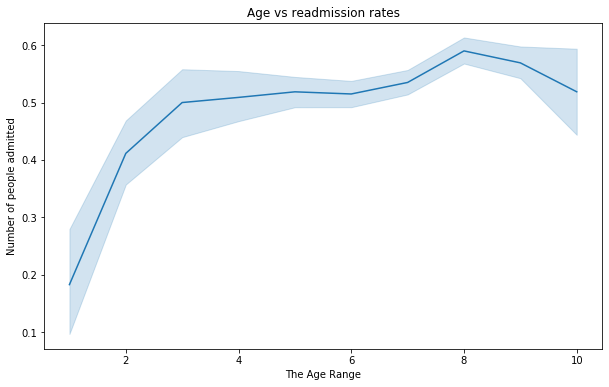

In [25]:
print(data["A1Cresult"].value_counts())
plt.figure(figsize=(10,6))
plt.title("Age vs readmission rates")
sns.lineplot(data["age"],data["readmitted"])
plt.xlabel("The Age Range")
plt.ylabel("Number of people admitted")

Text(0, 0.5, 'Number of people Suffering')

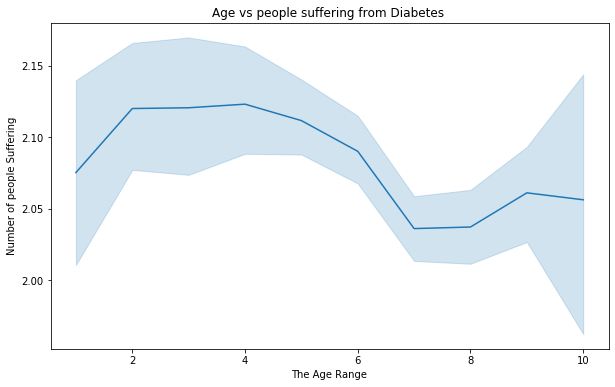

In [26]:
plt.figure(figsize=(10,6))
plt.title("Age vs people suffering from Diabetes ")
sns.lineplot(data["age"],data["A1Cresult"])
plt.xlabel("The Age Range")
plt.ylabel("Number of people Suffering")

Text(0, 0.5, 'Number of people Suffering')

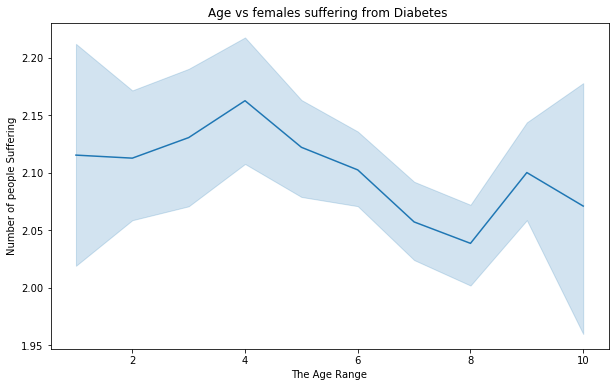

In [27]:
#number of females suffering from diabetes
data_female=data[data["gender"]==1]
plt.figure(figsize=(10,6))
plt.title("Age vs females suffering from Diabetes ")
sns.lineplot(data_female["age"],data_female["A1Cresult"])
plt.xlabel("The Age Range")
plt.ylabel("Number of people Suffering")

Text(0, 0.5, 'Number of people Suffering')

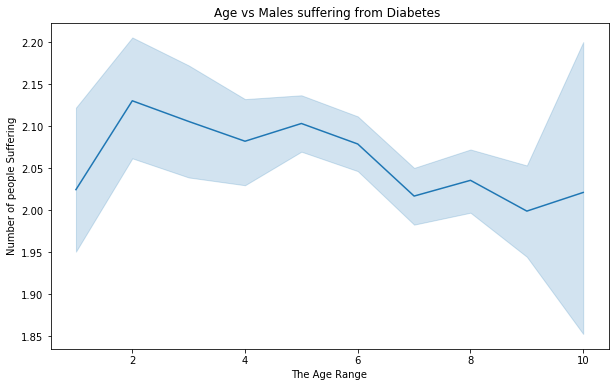

In [28]:
#number of males suffering from diabetes
data_male=data[data["gender"]==2]
plt.figure(figsize=(10,6))
plt.title("Age vs Males suffering from Diabetes ")
sns.lineplot(data_male["age"],data_male["A1Cresult"])
plt.xlabel("The Age Range")
plt.ylabel("Number of people Suffering")

Text(0, 0.5, 'Number of persons suffering')

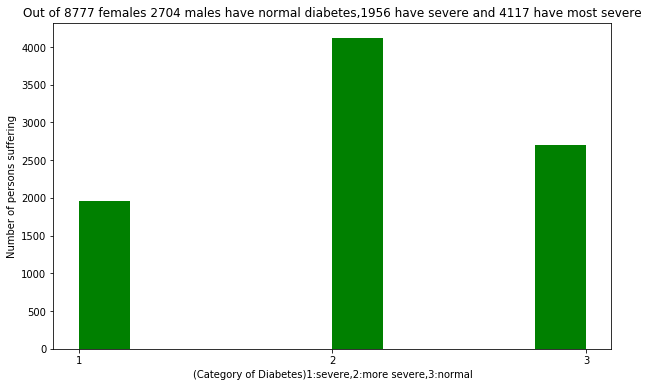

In [29]:
data_females=data[data["gender"]==1]
females_quantity=data_females.shape[0]
plt.figure(figsize=(10,6))
plt.title("Out of {} females {} males have normal diabetes,{} have severe and {} have most severe"
          .format(females_quantity,
                  (data_females["A1Cresult"][data_females["A1Cresult"]==3].count()),
                  (data_females["A1Cresult"][data_females["A1Cresult"]==1].count()),
                  (data_females["A1Cresult"][data_females["A1Cresult"]==2].count())))

data_females["A1Cresult"].plot(kind='hist',color="green")
plt.xlabel("(Category of Diabetes)1:severe,2:more severe,3:normal")
plt.xticks(ticks=[1.0,2.0,3.0])
plt.ylabel("Number of persons suffering")


Text(0, 0.5, 'Number of patients')

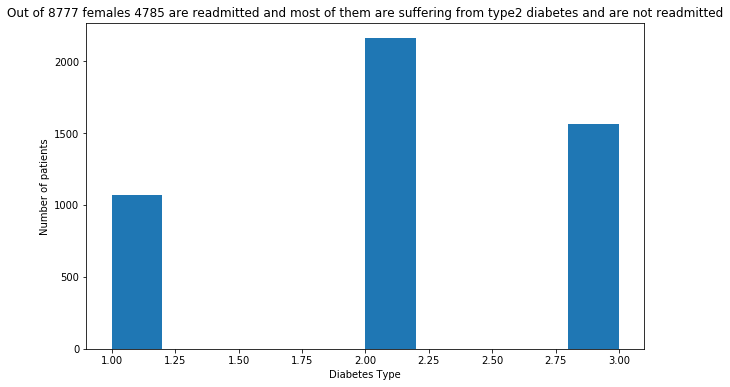

In [30]:
data_females_lessthan30=data[data["gender"]==1]
data_females_lessthan30["A1Cresult"]=data_females_lessthan30["A1Cresult"].astype("int16")
females_quantity=data_females_lessthan30.shape[0]
data_females_lessthan30=data_females_lessthan30[data_females_lessthan30["readmitted"]==0]
plt.figure(figsize=(10,6))
plt.title("Out of {} females {} are readmitted and most of them are suffering from type2 diabetes and are not readmitted"
          .format(females_quantity,(data_females_lessthan30.shape[0])))
data_females_lessthan30["A1Cresult"].plot(kind='hist')
plt.xlabel("Diabetes Type")
plt.ylabel("Number of patients")


Text(0.5, 0, 'Age Range')

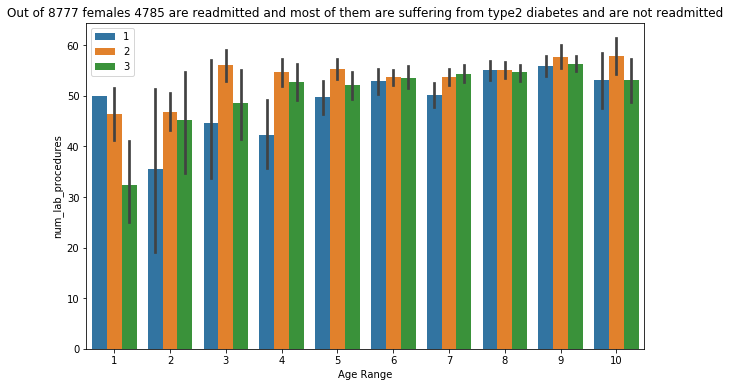

In [31]:
data_females_lessthan30=data[data["gender"]==1]
data_females_lessthan30["A1Cresult"]=data_females_lessthan30["A1Cresult"].astype("int16")
females_quantity=data_females_lessthan30.shape[0]
data_females_lessthan30=data_females_lessthan30[data_females_lessthan30["readmitted"]==0]
plt.figure(figsize=(10,6))
plt.title("Out of {} females {} are readmitted and most of them are suffering from type2 diabetes and are not readmitted"
          .format(females_quantity,(data_females_lessthan30.shape[0])))
sns.barplot(x=data_females_lessthan30["age"],y=data_females_lessthan30["num_lab_procedures"],hue=
            data_females_lessthan30["A1Cresult"])
plt.legend()
plt.xlabel("Age Range")
#plt.yticks(ticks=[1.0,2.0,3.0])
#plt.ylabel("Type of diabetes-1:high,2:very high 3:normal")
#print(data_females_lessthan30.shape)
#data_females_lessthan30["A1Cresult"].value_counts()
#conclusion:=very high diabetic people are having more chances 

Text(0, 0.5, 'Number of patients')

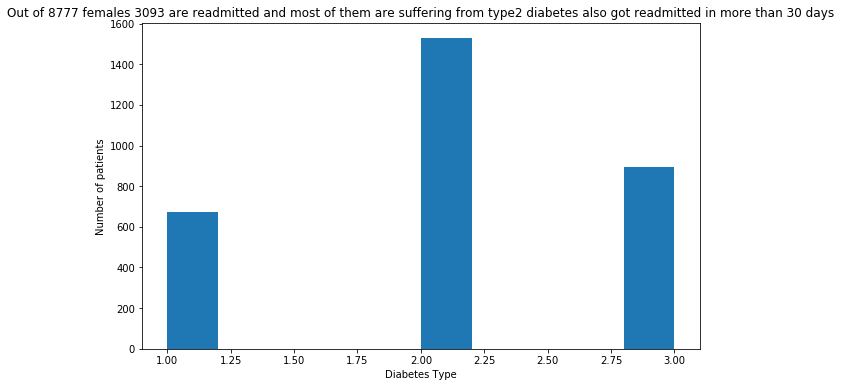

In [32]:
data_females_lessthan30=data[data["gender"]==1]
data_females_lessthan30["A1Cresult"]=data_females_lessthan30["A1Cresult"].astype("int16")
females_quantity=data_females_lessthan30.shape[0]
data_females_lessthan30=data_females_lessthan30[data_females_lessthan30["readmitted"]==1]
plt.figure(figsize=(10,6))
plt.title("Out of {} females {} are readmitted and most of them are suffering from type2 diabetes also got readmitted in more than 30 days"
          .format(females_quantity,(data_females_lessthan30.shape[0])))
data_females_lessthan30["A1Cresult"].plot(kind='hist')
plt.xlabel("Diabetes Type")
plt.ylabel("Number of patients")


Text(0, 0.5, 'Type of diabetes-1:high,2:very high 3:normal with lab procedures')

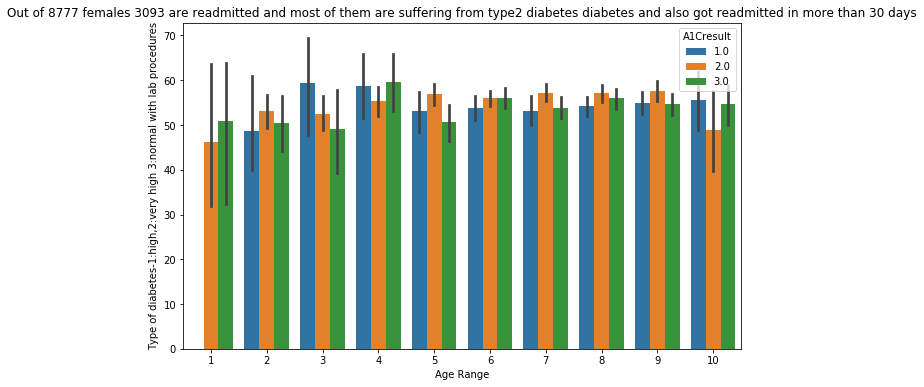

In [33]:
data_females_lessthan30=data[data["gender"]==1]
females_quantity=data_females_lessthan30.shape[0]
data_females_lessthan30=data_females_lessthan30[data_females_lessthan30["readmitted"]==1]
plt.figure(figsize=(10,6))
plt.title("Out of {} females {} are readmitted and most of them are suffering from type2 diabetes diabetes and also got readmitted in more than 30 days"
          .format(females_quantity,(data_females_lessthan30.shape[0])))
sns.barplot(data_females_lessthan30["age"],y=data_females_lessthan30["num_lab_procedures"],hue=data_females_lessthan30["A1Cresult"])
plt.xlabel("Age Range")
plt.ylabel("Type of diabetes-1:high,2:very high 3:normal with lab procedures")
#conclusion:=very high diabetic people are having more chances 

Text(0, 0.5, 'Number of patients')

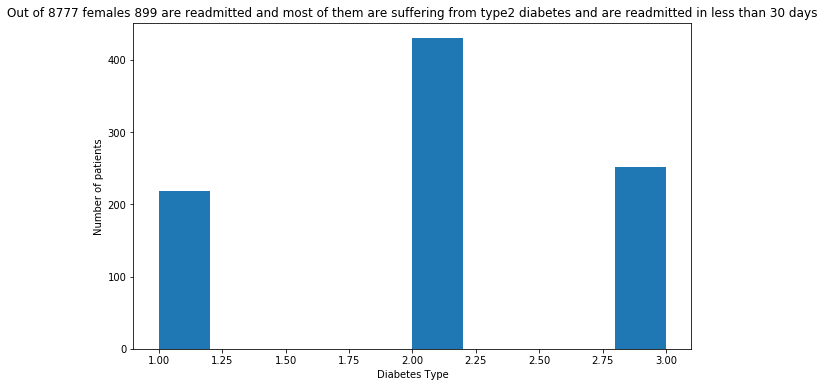

In [34]:
data_females_lessthan30=data[data["gender"]==1]
females_quantity=data_females_lessthan30.shape[0]
data_females_lessthan30=data_females_lessthan30[data_females_lessthan30["readmitted"]==2]
plt.figure(figsize=(10,6))
plt.title("Out of {} females {} are readmitted and most of them are suffering from type2 diabetes and are readmitted in less than 30 days"
          .format(females_quantity,(data_females_lessthan30.shape[0])))
data_females_lessthan30["A1Cresult"].plot(kind='hist')
plt.xlabel("Diabetes Type")
plt.ylabel("Number of patients")

#conclusion:=very high diabetic people are having more chances 

Text(0, 0.5, 'Type of diabetes-1:high,2:very high 3:normal with lab procedures')

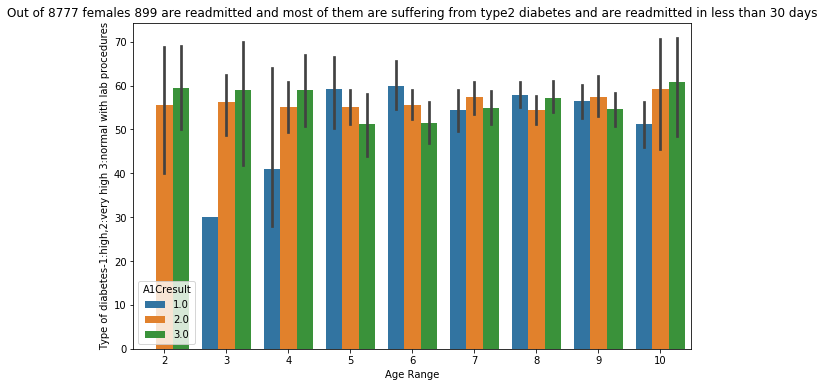

In [35]:
data_females_lessthan30=data[data["gender"]==1]
females_quantity=data_females_lessthan30.shape[0]
data_females_lessthan30=data_females_lessthan30[data_females_lessthan30["readmitted"]==2]
plt.figure(figsize=(10,6))
plt.title("Out of {} females {} are readmitted and most of them are suffering from type2 diabetes and are readmitted in less than 30 days"
          .format(females_quantity,(data_females_lessthan30.shape[0])))
sns.barplot(data_females_lessthan30["age"],y=data_females_lessthan30["num_lab_procedures"],hue=data_females_lessthan30["A1Cresult"])
plt.xlabel("Age Range")
plt.ylabel("Type of diabetes-1:high,2:very high 3:normal with lab procedures")

#conclusion:=very high diabetic people are having more chances 

Text(0, 0.5, 'Number of persons suffering')

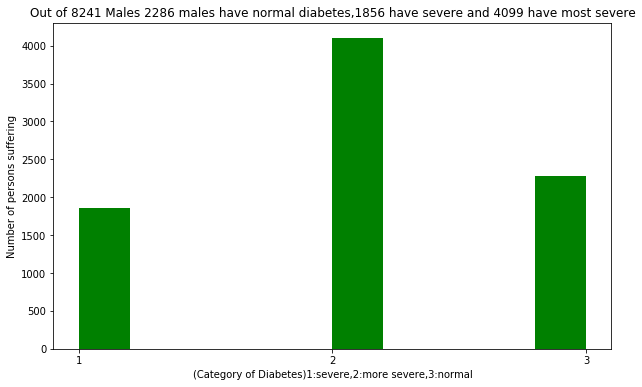

In [36]:
data_males=data[data["gender"]==2]
males_quantity=data_males.shape[0]
plt.figure(figsize=(10,6))
plt.title("Out of {} Males {} males have normal diabetes,{} have severe and {} have most severe"
          .format(males_quantity,
                  (data_males["A1Cresult"][data_males["A1Cresult"]==3].count()),
                  (data_males["A1Cresult"][data_males["A1Cresult"]==1].count()),
                  (data_males["A1Cresult"][data_males["A1Cresult"]==2].count())))

data_males["A1Cresult"].plot(kind='hist',color="green")
plt.xlabel("(Category of Diabetes)1:severe,2:more severe,3:normal")
plt.xticks(ticks=[1.0,2.0,3.0])
plt.ylabel("Number of persons suffering")


Text(0, 0.5, 'Number of patients')

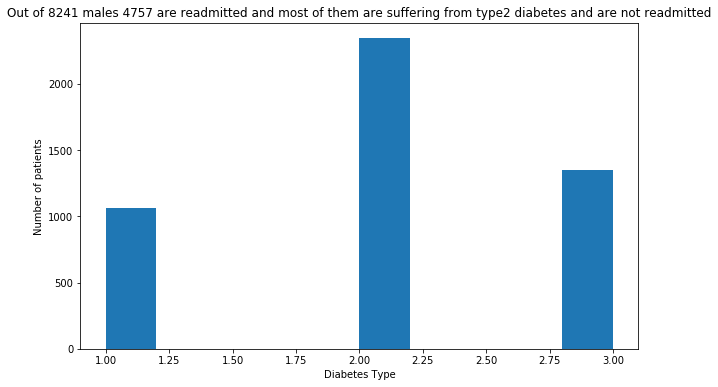

In [37]:
data_males_lessthan30=data[data["gender"]==2]
males_quantity=data_males_lessthan30.shape[0]
data_males_lessthan30=data_males_lessthan30[data_males_lessthan30["readmitted"]==0]
plt.figure(figsize=(10,6))
plt.title("Out of {} males {} are readmitted and most of them are suffering from type2 diabetes and are not readmitted"
          .format(males_quantity,(data_males_lessthan30.shape[0])))
data_males_lessthan30["A1Cresult"].plot(kind='hist')
plt.xlabel("Diabetes Type")
plt.ylabel("Number of patients")

#conclusion:=very high diabetic people are having more chances 

Text(0, 0.5, 'Type of diabetes-1:high,2:very high 3:normal with lab procedures')

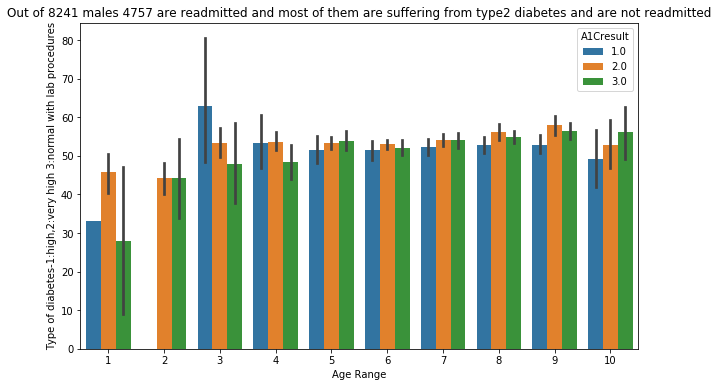

In [38]:
data_males_lessthan30=data[data["gender"]==2]
males_quantity=data_males_lessthan30.shape[0]
data_males_lessthan30=data_males_lessthan30[data_males_lessthan30["readmitted"]==0]
plt.figure(figsize=(10,6))
plt.title("Out of {} males {} are readmitted and most of them are suffering from type2 diabetes and are not readmitted"
          .format(males_quantity,(data_males_lessthan30.shape[0])))
sns.barplot(data_males_lessthan30["age"],data_males_lessthan30["num_lab_procedures"],hue=data_males_lessthan30["A1Cresult"])
plt.xlabel("Age Range")
plt.ylabel("Type of diabetes-1:high,2:very high 3:normal with lab procedures")

#conclusion:=very high diabetic people are having more chances 

Text(0, 0.5, 'Number of patients')

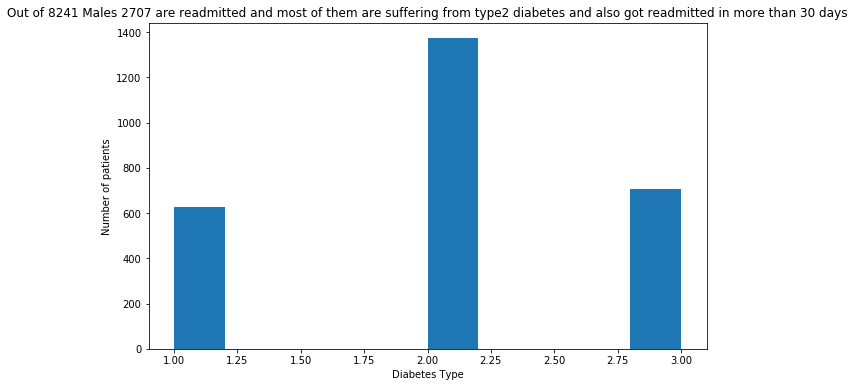

In [39]:
data_males_lessthan30=data[data["gender"]==2]
males_quantity=data_males_lessthan30.shape[0]
data_males_lessthan30=data_males_lessthan30[data_males_lessthan30["readmitted"]==1]
plt.figure(figsize=(10,6))
plt.title("Out of {} Males {} are readmitted and most of them are suffering from type2 diabetes and also got readmitted in more than 30 days"
          .format(males_quantity,(data_males_lessthan30.shape[0])))
data_males_lessthan30["A1Cresult"].plot(kind="hist")
plt.xlabel("Diabetes Type")
plt.ylabel("Number of patients")

#conclusion:=very high diabetic people are having more chances 

Text(0, 0.5, 'Type of diabetes-1:high,2:very high 3:normal with lab procedures')

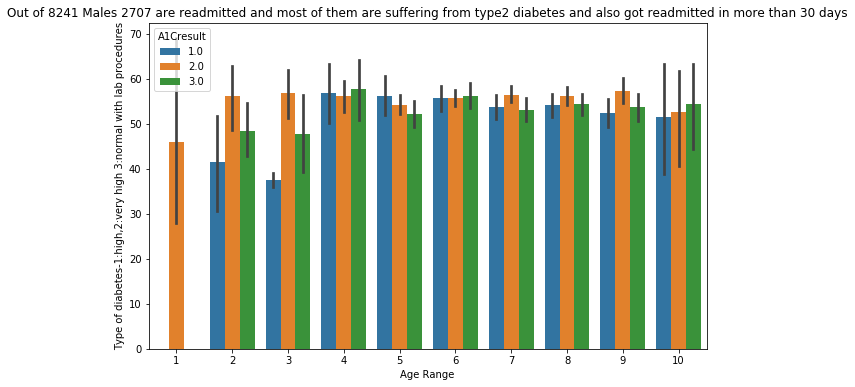

In [40]:
data_males_lessthan30=data[data["gender"]==2]
males_quantity=data_males_lessthan30.shape[0]
data_males_lessthan30=data_males_lessthan30[data_males_lessthan30["readmitted"]==1]
plt.figure(figsize=(10,6))
plt.title("Out of {} Males {} are readmitted and most of them are suffering from type2 diabetes and also got readmitted in more than 30 days"
          .format(males_quantity,(data_males_lessthan30.shape[0])))
sns.barplot(data_males_lessthan30["age"],data_males_lessthan30["num_lab_procedures"],hue=data_males_lessthan30["A1Cresult"])
plt.xlabel("Age Range")
#plt.yticks(ticks=[1.0,2.0,3.0])
plt.ylabel("Type of diabetes-1:high,2:very high 3:normal with lab procedures")

#conclusion:=very high diabetic people are having more chances 

Text(0, 0.5, 'Number of patients')

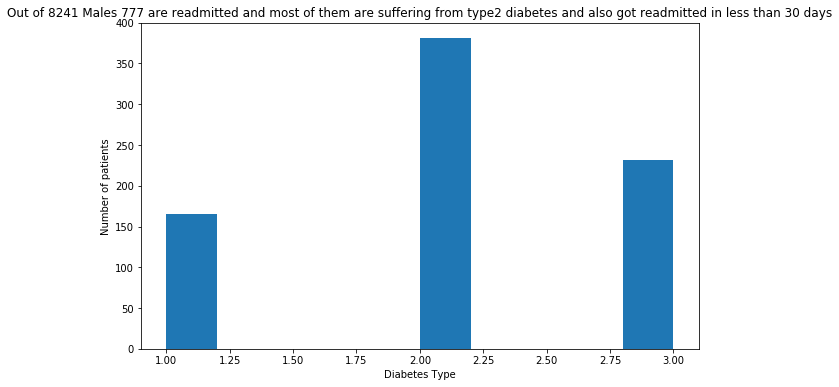

In [41]:
data_males_lessthan30=data[data["gender"]==2]
males_quantity=data_males_lessthan30.shape[0]
data_males_lessthan30=data_males_lessthan30[data_males_lessthan30["readmitted"]==2]
plt.figure(figsize=(10,6))
plt.title("Out of {} Males {} are readmitted and most of them are suffering from type2 diabetes and also got readmitted in less than 30 days"
          .format(males_quantity,(data_males_lessthan30.shape[0])))
data_males_lessthan30["A1Cresult"].plot(kind="hist")
plt.xlabel("Diabetes Type")
plt.ylabel("Number of patients")

#conclusion:=very high diabetic people are having more chances 

Text(0, 0.5, 'Type of diabetes-1:high,2:very high 3:normal with lab procedures')

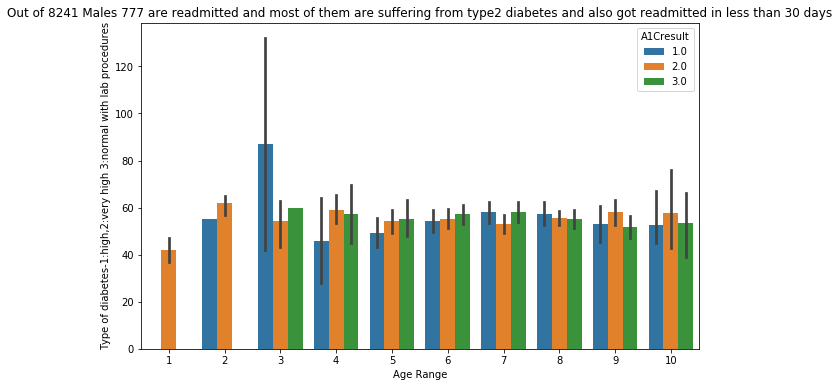

In [42]:
data_males_lessthan30=data[data["gender"]==2]
males_quantity=data_males_lessthan30.shape[0]
data_males_lessthan30=data_males_lessthan30[data_males_lessthan30["readmitted"]==2]
plt.figure(figsize=(10,6))
plt.title("Out of {} Males {} are readmitted and most of them are suffering from type2 diabetes and also got readmitted in less than 30 days"
          .format(males_quantity,(data_males_lessthan30.shape[0])))
sns.barplot(data_males_lessthan30["age"],data_males_lessthan30["num_lab_procedures"],hue=data_males_lessthan30["A1Cresult"])
plt.xlabel("Age Range")
#plt.yticks(ticks=[1.0,2.0,3.0])
plt.ylabel("Type of diabetes-1:high,2:very high 3:normal with lab procedures")

#conclusion:=very high diabetic people are having more chances 

In [43]:
# data_females_lessthan30=data[data["gender"]==1]
# females_quantity=data_females_lessthan30.shape[0]
# data_females_lessthan30=data_females_lessthan30[data_females_lessthan30["readmitted"]==0]
# plt.figure(figsize=(10,6))
# plt.title("Out of {} females {} are readmitted and most of them are suffering from type2 diabetes and are not readmitted"
#           .format(females_quantity,(data_females_lessthan30.shape[0])))
# sns.barplot(data_females_lessthan30["age"],data_females_lessthan30["A1Cresult"])
# plt.xlabel("Age Range")
# plt.yticks(ticks=[1.0,2.0,3.0])
# plt.ylabel("Type of diabetes-1:high,2:very high 3:normal")

# #conclusion:=very high diabetic people are having more chances 
# data_females_lessthan30=data[data["gender"]==1]
# females_quantity=data_females_lessthan30.shape[0]
# data_females_lessthan30=data_females_lessthan30[data_females_lessthan30["readmitted"]==1]
# plt.figure(figsize=(10,6))
# plt.title("Out of {} females {} are readmitted and most of them are suffering from type2 diabetes diabetes and also got readmitted in more than 30 days"
#           .format(females_quantity,(data_females_lessthan30.shape[0])))
# sns.barplot(data_females_lessthan30["age"],data_females_lessthan30["A1Cresult"])
# plt.xlabel("Age Range")
# plt.yticks(ticks=[1.0,2.0,3.0])
# plt.ylabel("Type of diabetes-1:high,2:very high 3:normal")

# #conclusion:=very high diabetic people are having more chances 
# data_females_lessthan30=data[data["gender"]==1]
# females_quantity=data_females_lessthan30.shape[0]
# data_females_lessthan30=data_females_lessthan30[data_females_lessthan30["readmitted"]==2]
# plt.figure(figsize=(10,6))
# plt.title("Out of {} females {} are readmitted and most of them are suffering from type2 diabetes and are readmitted in less than 30 days"
#           .format(females_quantity,(data_females_lessthan30.shape[0])))
# sns.barplot(data_females_lessthan30["age"],data_females_lessthan30["A1Cresult"])
# plt.xlabel("Age Range")
# plt.yticks(ticks=[1.0,2.0,3.0])
# plt.ylabel("Type of diabetes-1:high,2:very high 3:normal")

# #conclusion:=very high diabetic people are having more chances 

# data_males=data[data["gender"]==2]
# males_quantity=data_males.shape[0]
# plt.figure(figsize=(10,6))
# plt.title("Out of {} Males {} males have normal diabetes,{} have severe and {} have most severe"
#           .format(males_quantity,
#                   (data_males["A1Cresult"][data_males["A1Cresult"]==3].count()),
#                   (data_males["A1Cresult"][data_males["A1Cresult"]==1].count()),
#                   (data_males["A1Cresult"][data_males["A1Cresult"]==2].count())))

# data_males["A1Cresult"].plot(kind='hist',color="green")
# plt.xlabel("(Category of Diabetes)1:severe,2:more severe,3:normal")
# plt.xticks(ticks=[1.0,2.0,3.0])
# plt.ylabel("Number of persons suffering")
# data_males_lessthan30=data[data["gender"]==2]
# males_quantity=data_males_lessthan30.shape[0]
# data_males_lessthan30=data_males_lessthan30[data_males_lessthan30["readmitted"]==0]
# plt.figure(figsize=(10,6))
# plt.title("Out of {} males {} are readmitted and most of them are suffering from type2 diabetes and are not readmitted"
#           .format(males_quantity,(data_males_lessthan30.shape[0])))
# sns.barplot(data_males_lessthan30["age"],data_males_lessthan30["A1Cresult"])
# plt.xlabel("Age Range")
# plt.yticks(ticks=[1.0,2.0,3.0])
# plt.ylabel("Type of diabetes-1:high,2:very high 3:normal")

# #conclusion:=very high diabetic people are having more chances 
# data_males_lessthan30=data[data["gender"]==2]
# males_quantity=data_males_lessthan30.shape[0]
# data_males_lessthan30=data_males_lessthan30[data_males_lessthan30["readmitted"]==1]
# plt.figure(figsize=(10,6))
# plt.title("Out of {} Males {} are readmitted and most of them are suffering from type2 diabetes and also got readmitted in more than 30 days"
#           .format(males_quantity,(data_males_lessthan30.shape[0])))
# sns.barplot(data_males_lessthan30["age"],data_males_lessthan30["A1Cresult"])
# plt.xlabel("Age Range")
# plt.yticks(ticks=[1.0,2.0,3.0])
# plt.ylabel("Type of diabetes-1:high,2:very high 3:normal")

# #conclusion:=very high diabetic people are having more chances 

# data_males_lessthan30=data[data["gender"]==2]
# males_quantity=data_males_lessthan30.shape[0]
# data_males_lessthan30=data_males_lessthan30[data_males_lessthan30["readmitted"]==2]
# plt.figure(figsize=(10,6))
# plt.title("Out of {} Males {} are readmitted and most of them are suffering from type2 diabetes and also got readmitted in less than 30 days"
#           .format(males_quantity,(data_males_lessthan30.shape[0])))
# sns.barplot(data_males_lessthan30["age"],data_males_lessthan30["A1Cresult"])
# plt.xlabel("Age Range")
# plt.yticks(ticks=[1.0,2.0,3.0])
# plt.ylabel("Type of diabetes-1:high,2:very high 3:normal")

# #conclusion:=very high diabetic people are having more chances 

#  CREATING MODELS

In [44]:
#doing some feature importance task 
#splitting the data for feature importance
data_x_train,data_x_test=train_test_split(datafull,test_size=.33,random_state=42)
data_x_train.shape,data_x_test.shape
data_train_x=data_x_train.drop(["readmitted"],axis=1)
data_train_y=data_x_train["readmitted"]

#splitting into feature and targets
data_test_x=data_x_test.drop(["readmitted"],axis=1)
data_test_y=data_x_test["readmitted"]

In [45]:
#function to get variable importances
def plot_graph(a):
    plt.figure(figsize=(20,12))
    chart=sns.barplot(x=a["name_of_column"],y=a["feature_importance"])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
def feature_importance_plot_rev(dataframe,classifier,limit_of_the_importance):
    x=list(zip(dataframe.columns,classifier.feature_importances_))
    xx=pd.DataFrame(x)
    xx.columns=["name_of_column","feature_importance"]
    xx=xx.sort_values("feature_importance",ascending=False)
    xx=xx[xx["feature_importance"]>limit_of_the_importance]
    plot_graph(xx)
    return xx




In [46]:
lrc=LogisticRegressionCV(class_weight='balanced')
lrc.fit(data_train_x,data_train_y)
predicted_lrc=lrc.predict(data_test_x)
predicted_lrc_proba=lrc.predict_proba(data_test_x)
print("Step1:"+str(accuracy_score(predicted_lrc,data_test_y)))
print("Step1:"+str(classification_report(predicted_lrc,data_test_y)))


Step1:0.411502849002849
Step1:              precision    recall  f1-score   support

           0       0.51      0.64      0.57      2464
           1       0.25      0.42      0.31      1164
           2       0.44      0.12      0.19      1988

    accuracy                           0.41      5616
   macro avg       0.40      0.39      0.36      5616
weighted avg       0.43      0.41      0.38      5616



In [49]:
DTC=DecisionTreeClassifier(class_weight='balanced')
DTC.fit(data_train_x,data_train_y)
predicted_dtc=DTC.predict(data_test_x)
predicted_dtc_proba=DTC.predict_proba(data_test_x)
print("Step1:"+str(accuracy_score(predicted_dtc,data_test_y)))
print("Step1:"+str(classification_report(predicted_dtc,data_test_y)))
feature_data_dtc=feature_importance_plot_rev(data_train_x,RFC,0)

Step1:0.4544159544159544
Step1:              precision    recall  f1-score   support

           0       0.56      0.58      0.57      3043
           1       0.38      0.37      0.38      1961
           2       0.11      0.10      0.10       612

    accuracy                           0.45      5616
   macro avg       0.35      0.35      0.35      5616
weighted avg       0.45      0.45      0.45      5616



NameError: name 'RFC' is not defined

In [ ]:
#randomforestclassifier for feature importance
RFC=RandomForestClassifier(class_weight='balanced',n_jobs=-1)
# step1:training to get the most important features
RFC.fit(data_train_x,data_train_y)
predicted_rfc=RFC.predict(data_test_x)
predicted_rfc_proba=RFC.predict_proba(data_test_x)
print("Step1:"+str(accuracy_score(predicted_rfc,data_test_y)))
print("Step1:"+str(classification_report(predicted_rfc,data_test_y)))
feature_data_rfc=feature_importance_plot_rev(data_train_x,RFC,0)
#step2:training on teh most important features only to check the performance
final_features_to_be_considered_frc=feature_data_rfc["name_of_column"][:21]
feature_data_rfc=feature_importance_plot_rev(data_train_x,RFC,0)
#fitting the data
RFC.fit(data_train_x,data_train_y)
predicted_rfc=RFC.predict(data_test_x)
predicted_rfc_proba=RFC.predict_proba(data_test_x)

print("Step2:"+str(accuracy_score(predicted_rfc,data_test_y)))
print("Step2:"+str(classification_report(predicted_rfc,data_test_y)))


In [ ]:
#checking feature importance by GBC
GBC=GradientBoostingClassifier()
GBC.fit(data_train_x,data_train_y)
feature_importance_plot_rev(data_train_x,GBC,0)
predicted_gbc=GBC.predict(data_test_x)
predicted_gbc_proba=GBC.predict_proba(data_test_x)
print("Step1:"+str(accuracy_score(predicted_gbc,data_test_y)))
print("Step1:"+str(classification_report(predicted_gbc,data_test_y)))


In [ ]:
ETC=ExtraTreeClassifier(class_weight='balanced')
ETC.fit(data_train_x,data_train_y)
feature_importance_plot_rev(data_train_x,ETC,0)
predicted_etc=ETC.predict(data_test_x)
predicted_etc_proba=ETC.predict_proba(data_test_x)
print("Step1:"+str(accuracy_score(predicted_etc,data_test_y)))
print("Step1:"+str(classification_report(predicted_etc,data_test_y)))


# Hyperparameter tuning or fine tuning our model

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
# #parameters dictionary with all the features 
# param_dict={
#     'bootstrap':[True,False],
#     'class_weight':[None,'balanced'],
#     'criterion':['gini','entropy'],
#     'max_depth':[None,2,3,5,8,10],
#     'max_features':['auto',2,4,6,8,10,12],
#     'max_leaf_nodes':[None,2,4,6,8,10],
#     'min_samples_leaf':[1,3,5,7,9,11],
#     'min_samples_split':[2,4,6,8,10],
#     'n_estimators':['warn',10,20,30]
#     ,'oob_score':[False,True]
# }

# #only with few parameters for time constraint
# param_dict1={
#     'bootstrap':[True,False],
#     'class_weight':[None,'balanced'],
#     'criterion':['gini','entropy'],
#     'max_depth':[None,2,3],
#     'max_features':['auto',2,4],
#     'max_leaf_nodes':[None,2,4],
#     'min_samples_leaf':[1,3,],
#     'min_samples_split':[2,4],
#     'n_estimators':['warn',10]
#     ,'oob_score':[False]
# }



# #---------------------------------GRID SEARCH CV-------------------------------------
# #change the param_grid value =param_dict to perform full hyperparameter tuning with all the parameters
# gscv=GridSearchCV(RandomForestClassifier(),param_grid=param_dict1,cv=5,verbose=-2,n_jobs=-1)
# gscv.fit(data_train_x,data_train_y)
# #Best scores and parameters
# gscv.best_score_,gscv.best_params_


In [ ]:
# gscv.best_score_,gscv.best_params_